<a href="https://colab.research.google.com/github/Solstice302/CodSoft_Tasks/blob/main/CodSoft_Task2_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

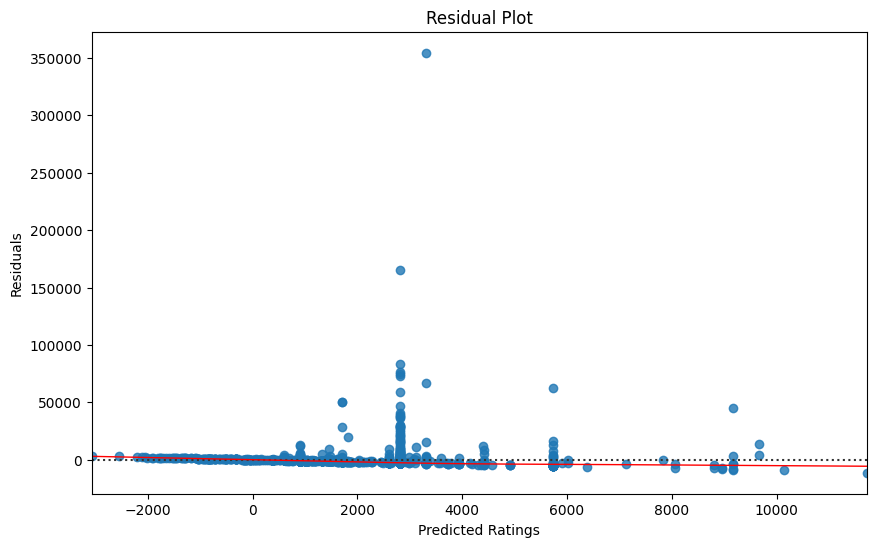

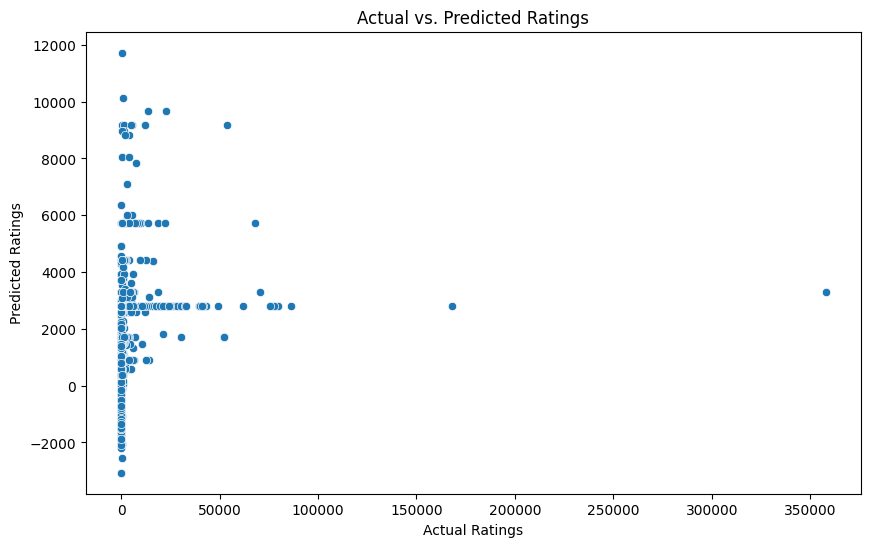

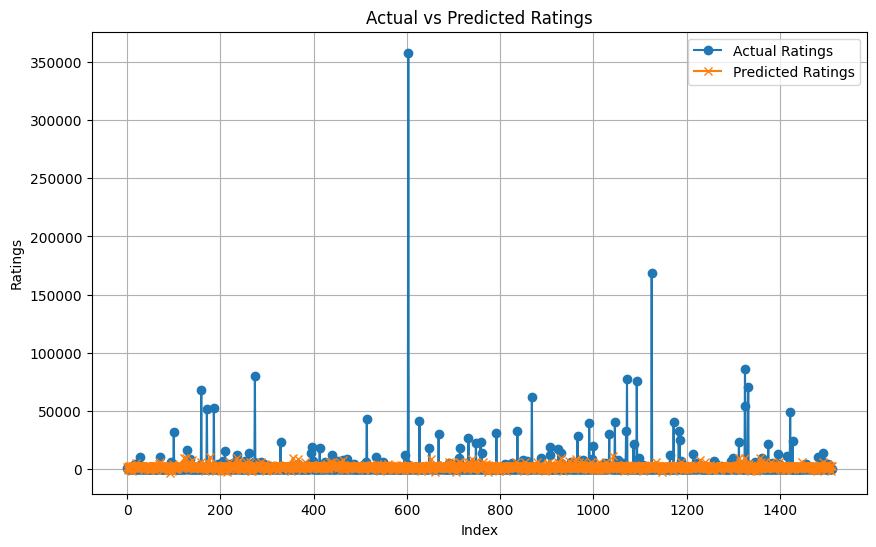

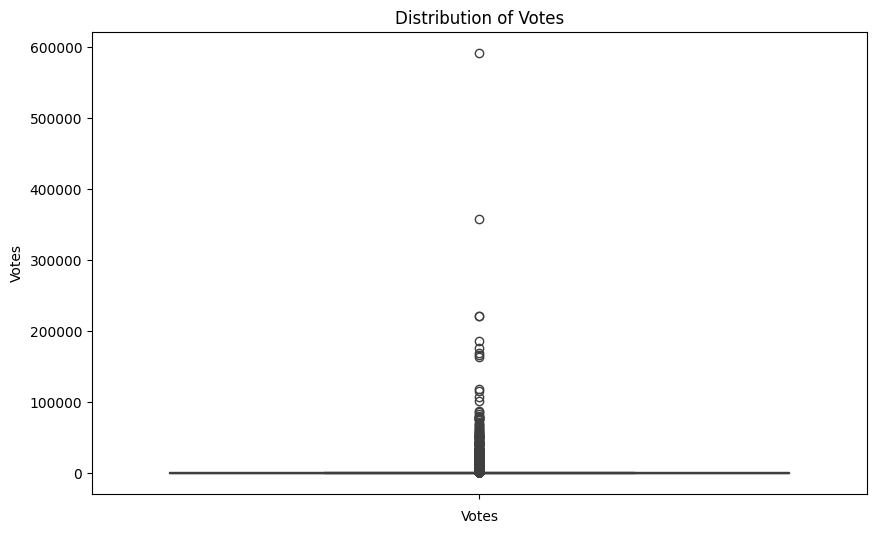

       Genre_Drama  Genre_Drama, Romance  Genre_Action, Crime, Drama  \
1                1                     0                           0   
3                0                     0                           0   
5                0                     0                           0   
6                0                     0                           0   
8                0                     0                           0   
...            ...                   ...                         ...   
15501            0                     0                           1   
15503            0                     0                           1   
15504            0                     0                           0   
15505            0                     0                           0   
15508            0                     0                           0   

       Genre_Action  Genre_Drama, Family  Genre_Action, Drama  Genre_Comedy  \
1                 0                    0                

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data_path = "/content/IMDb Movies India.csv"
data = pd.read_csv(data_path, encoding='latin1')

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Describe the dataset to get statistical summaries of the numerical columns
print(data.describe())

# Check for any missing values
print(data.isna().sum())

# Visualizing the distribution of 'Votes'
fig = px.histogram(data, x='Votes', title='Distribution of Votes')
fig.show()

# Visualizing the top genres
top_genres = data['Genre'].value_counts().nlargest(10)
fig = px.bar(top_genres, x=top_genres.index, y=top_genres.values, title='Top Genres')
fig.update_xaxes(title='Genre')
fig.update_yaxes(title='Count')
fig.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.show()

# Scatter plot of Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual Ratings', y='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#Line Plot
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual Ratings'], label='Actual Ratings', marker='o')
plt.plot(results_df.index, results_df['Predicted Ratings'], label='Predicted Ratings', marker='x')
plt.xlabel('Index')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()


# Convert 'Votes' to float before visualizing numerical distributions
data['Votes'] = data['Votes'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Dropping rows with missing values as per your requirements
data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

# Feature Engineering with limited One-Hot Encoding
def limit_one_hot_encode(df, column, N=10):
    top_categories = df[column].value_counts().nlargest(N).index
    for category in top_categories:
        name = f'{column}_{category}'
        df[name] = (df[column] == category).astype(int)
    return df

# After preprocessing - let's visualize the correlation of one-hot encoded features with 'Votes'
encoded_features = []
for feature in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data = limit_one_hot_encode(data, feature, N=10)  # Continuing from your feature engineering
    top_categories = data[feature].value_counts().nlargest(10).index
    encoded_features.extend([f'{feature}_{category}' for category in top_categories])

# EDA: Box plot to visualize the distribution of 'Votes'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Votes'])
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.show()

# Drop rows with missing values post 'Votes' cleaning
data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

X = data[encoded_features]
y = data['Votes']

print(X)
print(y)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\033[1mMean Squared Error:\033[0m {mse}")
print(f"\033[1mR-squared:\033[0m {r2}")

# Assuming 'y_test' and 'y_pred' are available from your model's evaluation
# Creating a DataFrame for easier manipulation with Plotly
results_df = pd.DataFrame({
    'Actual Ratings': y_test,
    'Predicted Ratings': y_pred
}).reset_index(drop=True)
